In [30]:
#!pip install -U featuretools
#!python -m pip install graphviz
#https://www.kaggle.com/code/willkoehrsen/automated-feature-engineering-tutorial

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import featuretools as ft
import warnings
warnings.filterwarnings('ignore')

from woodwork.logical_types import Categorical, PostalCode


In [9]:
# Load Data
clients = pd.read_csv('./data/clients.csv', parse_dates = ['joined'])
loans = pd.read_csv('./data/loans.csv', parse_dates = ['loan_start', 'loan_end'])
payments = pd.read_csv('./data/payments.csv', parse_dates = ['payment_date'])

clients.head()


,client_id,joined,income,credit_score
0,46109,2002-04-16,172677,527
1,49545,2007-11-14,104564,770
2,41480,2013-03-11,122607,585
3,46180,2001-11-06,43851,562
4,25707,2006-10-06,211422,621


## Data Representation with EntitySets
An EntitySet is a collection of dataframes and the relationships between them. They are useful for preparing raw, structured datasets for feature engineering. While many functions in Featuretools take dataframes and relationships as separate arguments, it is recommended to create an EntitySet, so you can more easily manipulate your data as needed.



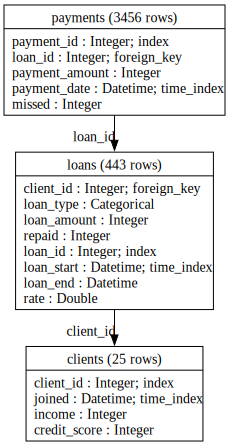

In [10]:
es = ft.EntitySet(id = 'clients')

## Entities Dataframe
es = es.add_dataframe(
    dataframe_name="clients",
    dataframe=clients,
    index="client_id",
    time_index="joined")

es = es.add_dataframe(
    dataframe_name="loans",
    dataframe=loans,
    index="loan_id",
    time_index="loan_start")

es = es.add_dataframe(
    dataframe_name="payments",
    dataframe=payments,
    index="payment_id",
    time_index="payment_date")

## Adding Relationships in dataframes

# Relationship between clients and previous loans
ed = es.add_relationship('clients', 'client_id', 'loans', 'client_id')

# Relationship between previous loans and previous payments
es = es.add_relationship('loans', 'loan_id', 'payments', 'loan_id')
es.plot()


In [15]:
es = ft.demo.load_mock_customer(return_entityset=True)
es['t']

Entityset: transactions
  DataFrames:
    transactions [Rows: 500, Columns: 6]
    products [Rows: 5, Columns: 3]
    sessions [Rows: 35, Columns: 5]
    customers [Rows: 5, Columns: 5]
  Relationships:
    transactions.product_id -> products.product_id
    transactions.session_id -> sessions.session_id
    sessions.customer_id -> customers.customer_id